## Create figures for Tazaki (submitted to MNRAS)


## Figure 3

In [7]:
import numpy as np
from geofractal import *
from otherformula import *

#-------------------------------------------------------
# Fractal dimension
#-------------------------------------------------------
df_chain = 1.0
df_bcca  = 1.9
df_bpca  = 3.0
#-------------------------------------------------------
# Fractal prefactor
#-------------------------------------------------------
k0_chain = np.sqrt(3.0)
k0_bcca  = 1.04
k0_bpca  = 0.3
#k0 = 0.5*(0.3-np.sqrt(3.0))*(df-1.0)+np.sqrt(3.0)
#-------------------------------------------------------
# Model of correlation function
#-------------------------------------------------------
cormodel= 'FLDIM'

#-------------------------------------------------------
# call geofractal.py
#-------------------------------------------------------
Nmin = 1.e0
Nmax = 1.e4
N    = 250
PN   = np.exp(np.linspace(math.log(Nmin),math.log(Nmax),N))
G_chain = np.zeros(N)
G_bcca = np.zeros(N)
G_bpca = np.zeros(N)
G_chain_exact = np.zeros(N)
G_M06_bcca = np.zeros(N)
G_M06_bpca = np.zeros(N)
#print('# model = %11s'%cormodel)
#print('# %11s %13s %13s %13s'%('N','Chain','BCCA','BPCA'))
for i in range(N):
    G_chain[i] = geofractal(PN[i],df_chain,k0_chain,cormodel)
    G_bcca[i] = geofractal(PN[i],df_bcca,k0_bcca,cormodel)
    G_bpca[i] = geofractal(PN[i],df_bpca,k0_bpca,cormodel)
    G_chain_exact[i] = chain_exact(PN[i])
    G_M06_bpca[i] = minato06_bpca(PN[i])
    G_M06_bcca[i] = minato06_bcca(PN[i])
    #print ('%13.6e %13.6e %13.6e %13.6e'%(PN[i],G_chain[i],G_bcca[i],G_bpca[i]))

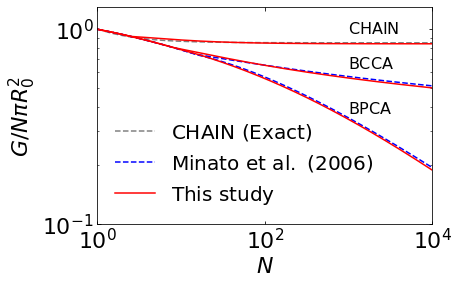

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
label_size=22
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1.e0,1.e4)
ax.set_ylim(1.0e-1,1.3)
ax.set_xlabel(r'$N$',fontsize=label_size)
ax.set_ylabel(r'$G/N\pi R_0^2$',fontsize=label_size)
ax.tick_params(labelsize=label_size,direction='in',which='both',right=True,top=True)
ax.plot(PN[:],G_chain_exact[:],color='grey',linestyle='--',label=r'$\mathrm{CHAIN~(Exact)}$')
ax.plot(PN[:],G_M06_bpca[:],color='b',linestyle='--',label=r'$\mathrm{Minato~et~al.~(2006)}$')
ax.plot(PN[:],G_M06_bcca[:],color='b',linestyle='--')
ax.plot(PN[:],G_chain[:],color='r',linestyle='-', label=r'$\mathrm{This~study}$')
ax.plot(PN[:],G_bpca[:],color='r',linestyle='-')
ax.plot(PN[:],G_bcca[:],color='r',linestyle='-')
ax.legend(fontsize=20,loc='lower left',frameon=False)
ax.text(1.e3,0.95, r'$\mathrm{CHAIN}$', fontsize=16)
ax.text(1.e3,0.63, r'$\mathrm{BCCA}$', fontsize=16)
ax.text(1.e3,0.37, r'$\mathrm{BPCA}$', fontsize=16)
#fig.tight_layout()
plt.show()
#plt.savefig('gratio_vs_minato.pdf')

## Figure 4